# Diabetes KNN Classification Project

My goal for this project is to create a classifer using KNN classification that determines which factors may lead to a diabetes diagnosis.

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

## Get the Data

In [4]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Exploratory Data Analysis

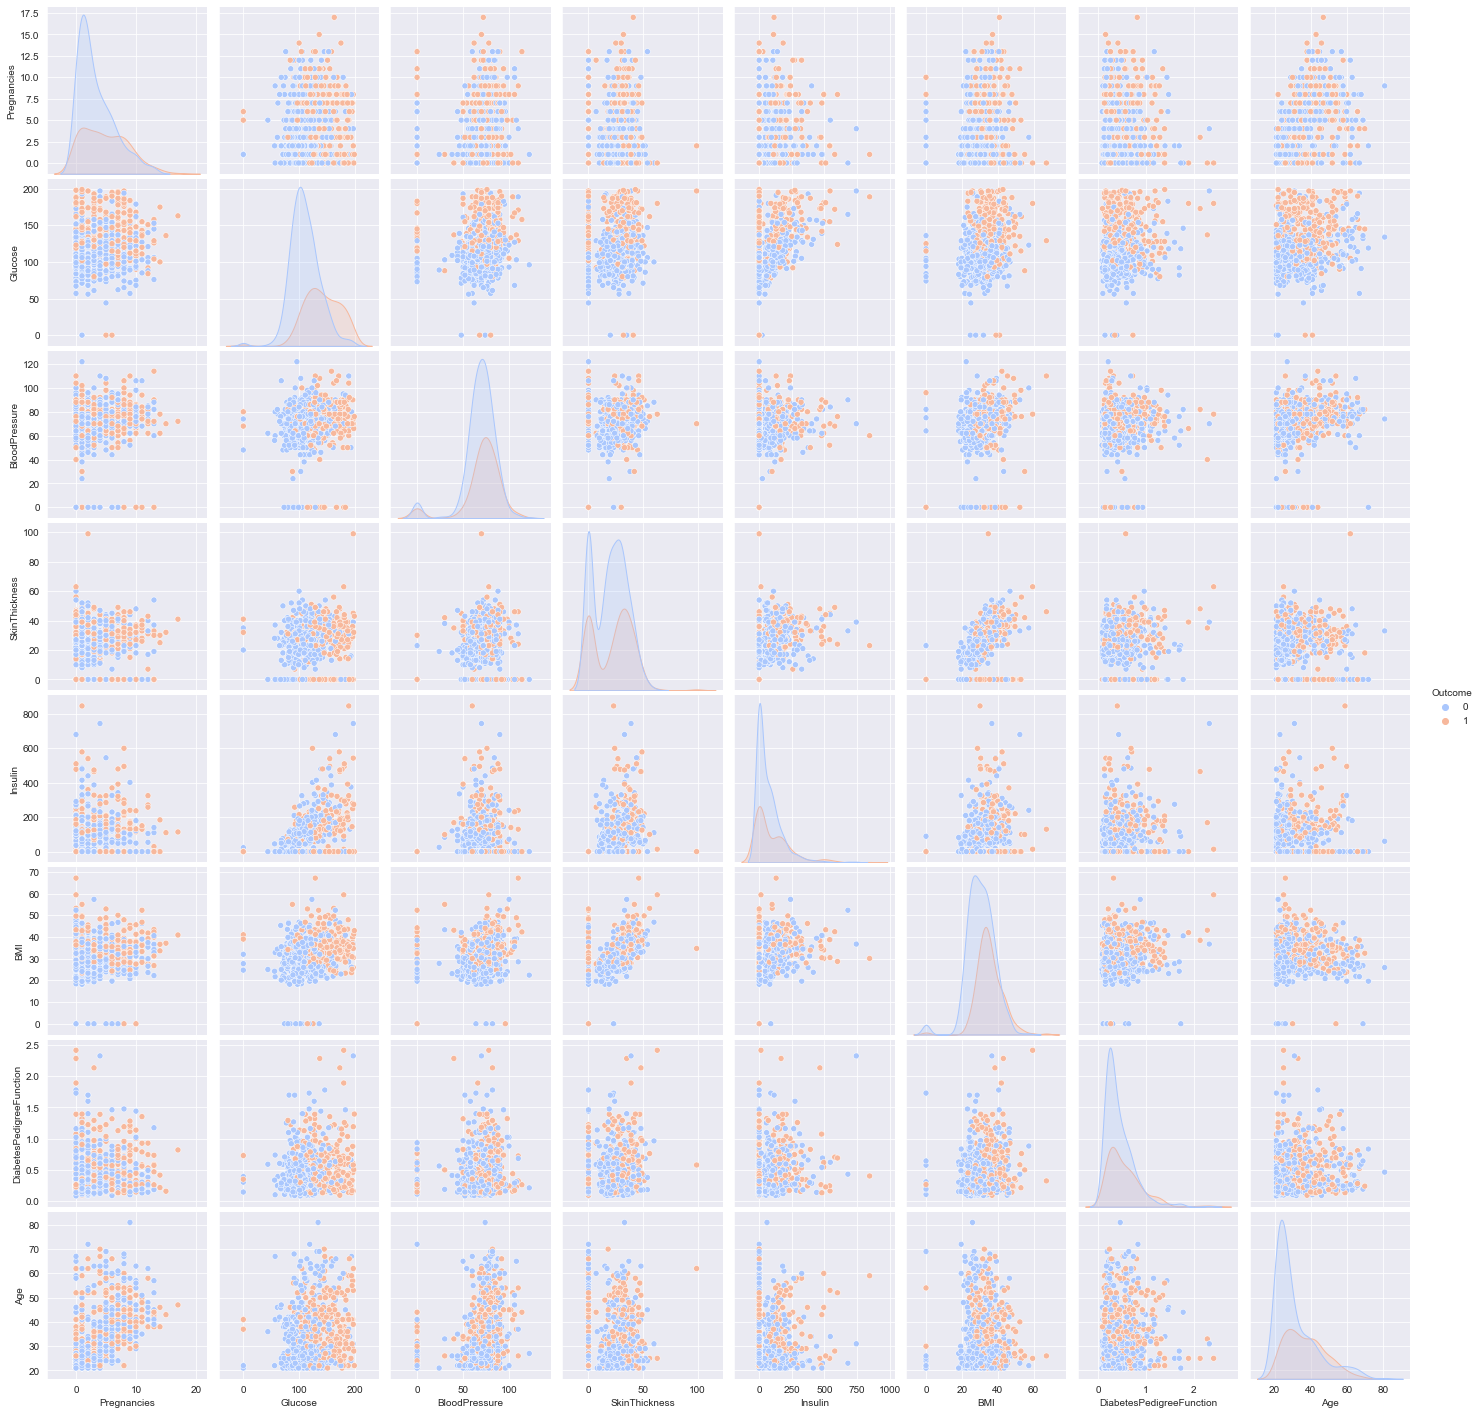

In [5]:
sns.pairplot(data, hue = 'Outcome', palette = 'coolwarm')

## Standardize the Variables

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
scaler.fit(data.drop('Outcome', axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
scaled_features = scaler.transform(data.drop('Outcome', axis = 1))

In [10]:
data_features = pd.DataFrame(scaled_features, columns = data.columns[:-1])
data_features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = data_features
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

## Using KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [25]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

## Predictions and Evaluations

In [26]:
predictions = knn.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
print(confusion_matrix(y_test, predictions))

[[123  27]
 [ 40  41]]


In [29]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.82      0.79       150
           1       0.60      0.51      0.55        81

    accuracy                           0.71       231
   macro avg       0.68      0.66      0.67       231
weighted avg       0.70      0.71      0.70       231



With a K of 1, the model is 68% accurate in correctly predicting the factors that cause diabetes. 

## Choosing a K Value

In [30]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error rate')

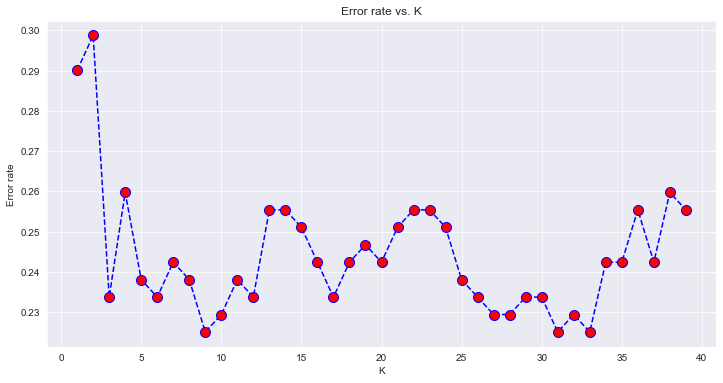

In [31]:
plt.figure(figsize = (12, 6))
plt.plot(range(1, 40), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title('Error rate vs. K')
plt.xlabel('K')
plt.ylabel('Error rate')

The K's that yield the lowest error rates appear to be 9, 31, and 33.

In [32]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[132  18]
 [ 34  47]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       150
           1       0.72      0.58      0.64        81

    accuracy                           0.77       231
   macro avg       0.76      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231



With a K of 9, the model is now 76% accurate in correctly predicting the factors that cause diabetes. This is a higher accuracy rate than the previous model that had a K value of 1.

In [35]:
knn = KNeighborsClassifier(n_neighbors = 31)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[137  13]
 [ 39  42]]
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       150
           1       0.76      0.52      0.62        81

    accuracy                           0.77       231
   macro avg       0.77      0.72      0.73       231
weighted avg       0.77      0.77      0.76       231



With a K of 31, the model is now 77% accurate in correctly predicting the factors that cause diabetes. This is a slightly higher accuracy rate than the previous model that had a K value of 9.

In [36]:
knn = KNeighborsClassifier(n_neighbors = 33)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[137  13]
 [ 39  42]]
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       150
           1       0.76      0.52      0.62        81

    accuracy                           0.77       231
   macro avg       0.77      0.72      0.73       231
weighted avg       0.77      0.77      0.76       231



With a K of 33, the model is now 77% accurate in correctly predicting the factors that cause diabetes. This is the same as the previous model with a K value of 31.